In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

import sklearn

from sklearn import preprocessing

import seaborn as sns

import lazypredict

from lazypredict.Supervised import LazyClassifier

train_df = pd.read_csv("C:/Users/pfali/Downloads/playground-series-s3e17/train.csv")

train_df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.60,309.60,1596,36.10,140,0,0,0,0,0,0
1,1,M20343,M,302.60,312.10,1759,29.10,200,0,0,0,0,0,0
2,2,L49454,L,299.30,308.50,1805,26.50,25,0,0,0,0,0,0
3,3,L53355,L,301.00,310.90,1524,44.30,197,0,0,0,0,0,0
4,4,M24050,M,298.00,309.00,1641,35.40,34,0,0,0,0,0,0


In [2]:
train_df.describe(include='all')

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.00,136429,136429,136429.00,136429.00,136429.00,136429.00,136429.00,136429.00,136429.00,136429.00,136429.00,136429.00,136429.00
unique,NaN,9976,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,L53257,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,139,95354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,68214.00,NaN,NaN,299.86,309.94,1520.33,40.35,104.41,0.02,0.00,0.01,0.00,0.00,0.00
std,39383.80,NaN,NaN,1.86,1.39,138.74,8.50,63.97,0.12,0.04,0.07,0.05,0.06,0.05
min,0.00,NaN,NaN,295.30,305.80,1181.00,3.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,34107.00,NaN,NaN,298.30,308.70,1432.00,34.60,48.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,68214.00,NaN,NaN,300.00,310.00,1493.00,40.40,106.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,102321.00,NaN,NaN,301.20,310.90,1580.00,46.10,159.00,0.00,0.00,0.00,0.00,0.00,0.00


In [3]:
train_df.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [4]:
print(train_df.dtypes)

id                           int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


The training set contains no null values. Only two features are objects. Target is Machine failure.

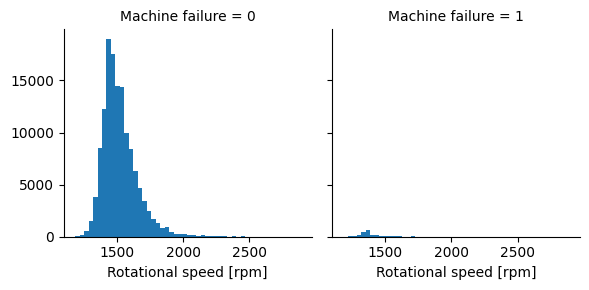

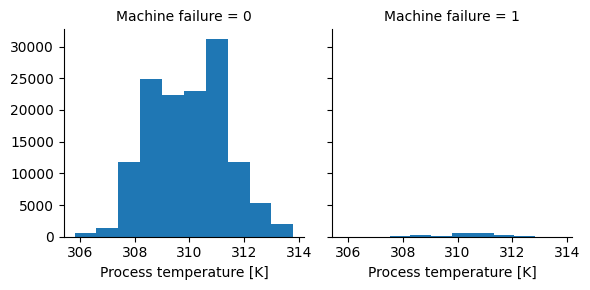

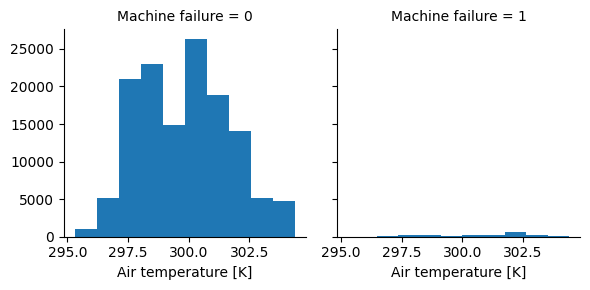

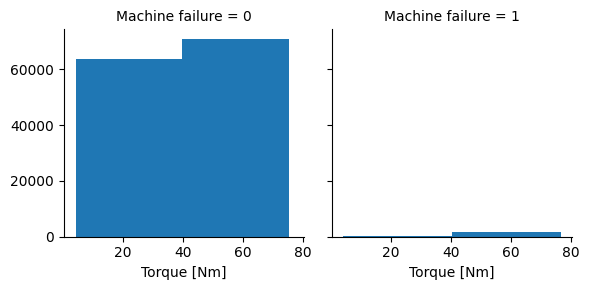

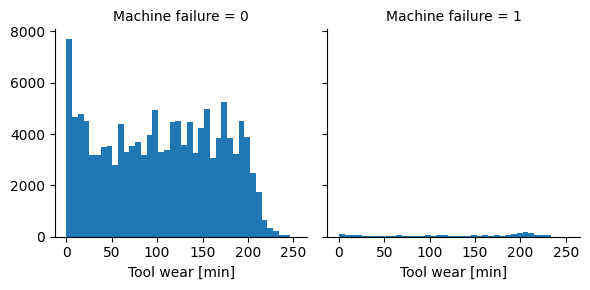

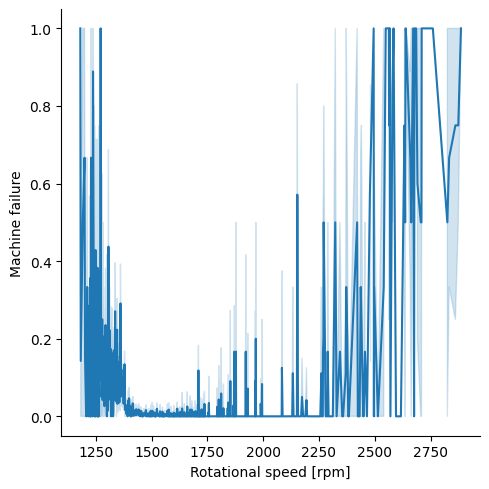

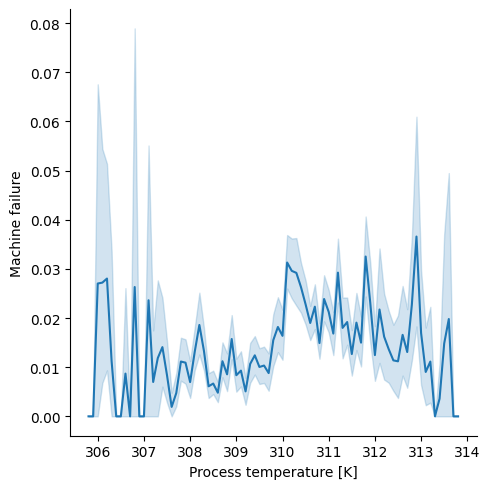

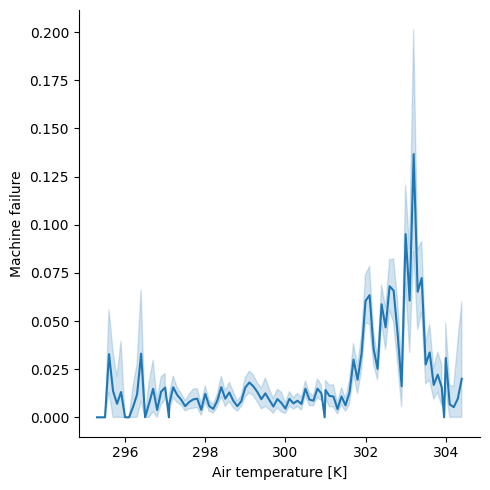

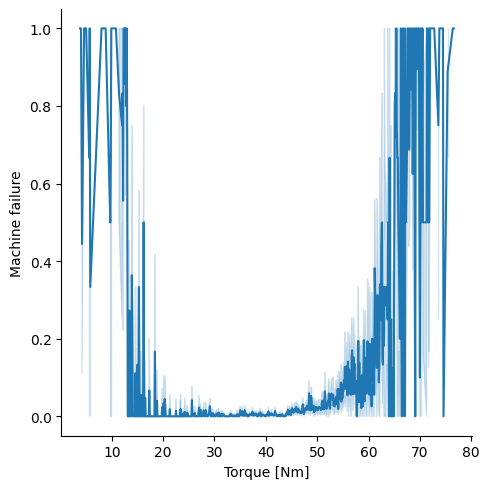

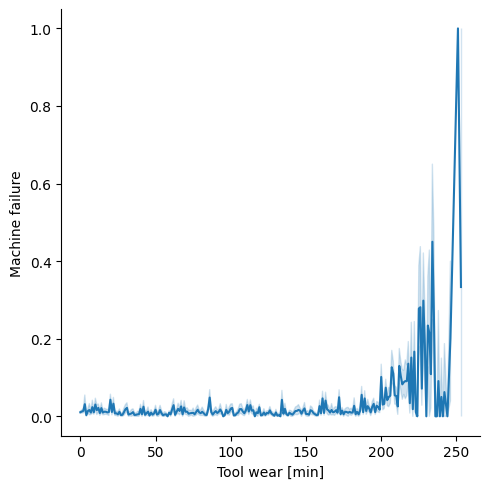

In [18]:
p = sns.FacetGrid(train_df, col='Machine failure')
p.map(plt.hist,'Rotational speed [rpm]', bins=50)

p = sns.FacetGrid(train_df, col='Machine failure')
p.map(plt.hist,'Process temperature [K]')

p = sns.FacetGrid(train_df, col='Machine failure')
p.map(plt.hist,'Air temperature [K]')

p = sns.FacetGrid(train_df, col='Machine failure')
p.map(plt.hist,'Torque [Nm]',bins=2)

p = sns.FacetGrid(train_df, col='Machine failure')
p.map(plt.hist,'Tool wear [min]',bins=40)


plt.rcParams["figure.figsize"] = (8,5.5)
sns.relplot(data=train_df,x='Rotational speed [rpm]',y="Machine failure",kind="line")
plt.rcParams["figure.figsize"] = (8,5.5)
sns.relplot(data=train_df,x='Process temperature [K]',y="Machine failure",kind="line")
plt.rcParams["figure.figsize"] = (8,5.5)
sns.relplot(data=train_df,x='Air temperature [K]',y="Machine failure",kind="line")
plt.rcParams["figure.figsize"] = (8,5.5)
sns.relplot(data=train_df,x='Torque [Nm]',y="Machine failure",kind="line")
plt.rcParams["figure.figsize"] = (8,5.5)
sns.relplot(data=train_df,x='Tool wear [min]',y="Machine failure",kind="line")


The above plots shows that:
- the rotational speed, air temperature, process temperature and tool wear and doen't correlate much with machine failure/non-failure; most of non-failures go together with any value of these features
- torque has better correlation with the target, but still not high
In general, it is better to leave all these features, because any of them carries some contribution to the target.

Type is the first element of the Product ID and as it is also a separate feature, it can be deleted in order to leave only the number in the Product ID.

In [6]:
train_df['Product']=train_df['Product ID'].str.split("H|M|L",expand=True)[1]

train_df.drop(columns=['Product ID'],inplace=True)

In [7]:
train_df.describe(include='all')

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Product
count,136429.00,136429,136429.00,136429.00,136429.00,136429.00,136429.00,136429.00,136429.00,136429.00,136429.00,136429.00,136429.00,136429
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9976
top,NaN,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53257
freq,NaN,95354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139
mean,68214.00,NaN,299.86,309.94,1520.33,40.35,104.41,0.02,0.00,0.01,0.00,0.00,0.00,NaN
std,39383.80,NaN,1.86,1.39,138.74,8.50,63.97,0.12,0.04,0.07,0.05,0.06,0.05,NaN
min,0.00,NaN,295.30,305.80,1181.00,3.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
25%,34107.00,NaN,298.30,308.70,1432.00,34.60,48.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
50%,68214.00,NaN,300.00,310.00,1493.00,40.40,106.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
75%,102321.00,NaN,301.20,310.90,1580.00,46.10,159.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN


In [8]:
le=preprocessing.LabelEncoder()
train_df['Type']=le.fit_transform(train_df['Type'])

le=preprocessing.LabelEncoder()
train_df['Product']=le.fit_transform(train_df['Product'])

corr_matrix=train_df.corr()
corr_matrix["Machine failure"].sort_values(ascending=False)

Machine failure            1.00
HDF                        0.56
OSF                        0.49
PWF                        0.38
TWF                        0.31
Torque [Nm]                0.15
Air temperature [K]        0.07
Tool wear [min]            0.06
Process temperature [K]    0.03
Product                    0.00
id                         0.00
RNF                        0.00
Type                      -0.01
Rotational speed [rpm]    -0.06
Name: Machine failure, dtype: float64

In [9]:
train_df.head()

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Product
0,0,1,300.60,309.60,1596,36.10,140,0,0,0,0,0,0,5737
1,1,2,302.60,312.10,1759,29.10,200,0,0,0,0,0,0,1629
2,2,1,299.30,308.50,1805,26.50,25,0,0,0,0,0,0,5329
3,3,1,301.00,310.90,1524,44.30,197,0,0,0,0,0,0,7689
4,4,2,298.00,309.00,1641,35.40,34,0,0,0,0,0,0,2736


In [10]:
from sklearn.model_selection import train_test_split

X = train_df.drop(["Machine failure"], axis = 1)
y = train_df["Machine failure"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

lc = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models_pred = lc.fit(X_train, X_test, y_train, y_test)
print(models_pred)

 17%|██████████████▎                                                                    | 5/29 [00:43<02:08,  5.37s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 45%|████████████████████████████████████▊                                             | 13/29 [03:23<06:01, 22.59s/it]

LabelPropagation model failed to execute
Unable to allocate 78.0 GiB for an array with shape (102321, 102321) and data type float64
LabelSpreading model failed to execute
Unable to allocate 78.0 GiB for an array with shape (102321, 102321) and data type float64


 62%|██████████████████████████████████████████████████▉                               | 18/29 [03:59<01:22,  7.53s/it]

NuSVC model failed to execute
specified nu is infeasible


 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [09:10<03:59, 79.82s/it]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [09:21<00:45, 45.34s/it]

[LightGBM] [Info] Number of positive: 1598, number of negative: 100723
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1460
[LightGBM] [Info] Number of data points in the train set: 102321, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015618 -> initscore=-4.143621
[LightGBM] [Info] Start training from score -4.143621


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [09:22<00:00, 19.41s/it]

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             0.99               0.89     0.89      0.99   
XGBClassifier                      1.00               0.88     0.88      1.00   
RandomForestClassifier             1.00               0.88     0.88      1.00   
ExtraTreesClassifier               1.00               0.88     0.88      1.00   
AdaBoostClassifier                 1.00               0.88     0.88      1.00   
CalibratedClassifierCV             1.00               0.88     0.88      1.00   
SVC                                1.00               0.88     0.88      1.00   
SGDClassifier                      1.00               0.88     0.88      1.00   
RidgeClassifierCV                  1.00               0.88     0.88      1.00   
LinearDiscriminantAnalysis         1.00               0.88     0.88      1.00   
LinearSVC                  

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)
clf.fit(X_test, y_test)

RandomForestClassifier(random_state=1)

In [19]:
train_score=clf.score(X_train, y_train)
test_score=clf.score(X_test, y_test)

print(train_score)
print(test_score)

0.9961591462163192
1.0


The scores look very good, thus, we can leave the default parameters for this model.

In [17]:
y_train.to_csv('MF_train.csv', index=True)
y_test.to_csv('MF_test.csv', index=True)